# Wordcloud, Frequent words, Sentiment Analysis, Emotion Detection, Classification 

# Analysing Reviews : Branch Wise 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import string

#nltk.download('stopwords')
#nltk.download('punkt')
from nltk import FreqDist     # is used to compute and represent the frequency distribution of a given list of items.
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import state_union

In [2]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set_style("white")

class color:
   BLUE = '\033[94m'
   BOLD = '\033[1m'
   END = '\033[0m'

###  load data

In [242]:
Disneyland = pd.read_csv(r"DisneylandReviews.csv",encoding="unicode_escape")
Disneyland.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [243]:
Disneyland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [244]:
Disneyland["Year_Month"].unique()

array(['2019-4', '2019-5', '2019-3', '2018-9', '2019-1', '2018-11',
       '2018-12', '2018-6', '2019-2', '2018-10', '2018-8', '2018-5',
       '2018-4', '2018-7', '2018-3', '2018-2', 'missing', '2018-1',
       '2017-12', '2017-11', '2017-6', '2017-10', '2017-9', '2017-8',
       '2017-7', '2017-5', '2017-4', '2017-3', '2017-2', '2017-1',
       '2016-12', '2016-11', '2016-10', '2016-9', '2016-8', '2016-7',
       '2016-6', '2016-5', '2016-4', '2016-3', '2016-2', '2016-1',
       '2015-12', '2015-11', '2015-10', '2015-9', '2015-8', '2015-7',
       '2015-6', '2015-5', '2015-4', '2015-3', '2015-2', '2015-1',
       '2014-12', '2014-11', '2014-10', '2014-9', '2014-8', '2014-7',
       '2014-6', '2014-5', '2014-4', '2014-3', '2014-2', '2014-1',
       '2013-12', '2013-11', '2013-10', '2013-9', '2013-8', '2013-7',
       '2013-6', '2013-5', '2013-4', '2013-3', '2013-2', '2013-1',
       '2012-12', '2012-11', '2012-10', '2012-9', '2012-8', '2012-7',
       '2012-6', '2012-5', '2012-4', '20

In [245]:
# to select rows whose columns value equals "missing " in "Year_month":
missing = Disneyland.loc[Disneyland["Year_Month"]=="missing"]

# keeping the  missing  rows seperate 
Disneyland = Disneyland[Disneyland.Year_Month != "missing"]

In [246]:
# yeqr for the year_month 
Disneyland["Year"] = pd.to_datetime(Disneyland["Year_Month"]).dt.strftime("%Y")

In [247]:
Disneyland.head(3)


,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019


In [248]:
#join back the missing in yaer_month
Disneyland = Disneyland.append(missing)
Disneyland.tail()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris,NaN
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris,NaN
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris,NaN
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris,NaN
42655,1536786,4,missing,United Kingdom,"I went to the Disneyparis resort, in 1996, wit...",Disneyland_Paris,NaN


In [249]:
Disneyland['Branch'] = Disneyland['Branch'].replace({'Disneyland_HongKong': 'HongKong', 
                                                     'Disneyland_California':'California', 
                                                     'Disneyland_Paris':'Paris'})

# Exploratory Data Analysis:
In this section I have done (EDA) to get a general idea of average ratings across all locations, where our visitors are from, and how the ratings changed over time.

In [250]:
%matplotlib inline 

count_uniques = pd.DataFrame(Disneyland["Branch"].value_counts()).rename(columns = {"Branch": "Total_count"}).sort_values("Total_count",ascending = False)

In [251]:
count_uniques.head()

,Total_count
California,19406
Paris,13630
HongKong,9620


In [252]:
print(color.BOLD +"Number of unique values in {} is {}".format('Branch', count_uniques.shape[0]), "\n"+ color.END)

Number of unique values in Branch is 3 



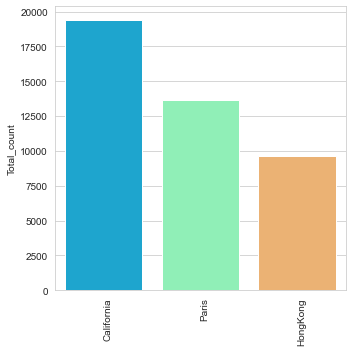

In [253]:
# Create Fiqure 
fig, ax = plt.subplots(figsize=(5,5))

x= sns.barplot(x=count_uniques.index.values.tolist() ,y="Total_count", data=count_uniques, palette="rainbow")
# rotate labels and aligns them horizontolly to left 

plt.setp( ax.xaxis.get_majorticklabels(), rotation=90, ha="left" )

plt.tight_layout()
plt.show()

Rename the fileds in Branch column for our convenices purpose 

### Average Rateing from each location and number of reviews for each location

In [254]:
avg_rating = pd.DataFrame(Disneyland.groupby(["Branch"]).agg({"Rating":["mean","count"]})).round(2).reset_index()

In [255]:
avg_rating

Branch Rating       
                mean  count
0  California   4.41  19406
1    HongKong   4.20   9620
2       Paris   3.96  13630

### Average Rateing year wise 

In [256]:
avg_rating_year = pd.DataFrame(Disneyland.groupby(["Branch","Year"]).agg({"Rating":["mean"]})).round(2)
avg_rating_year = avg_rating_year.unstack().T.reset_index().drop(columns=['level_0','level_1'])

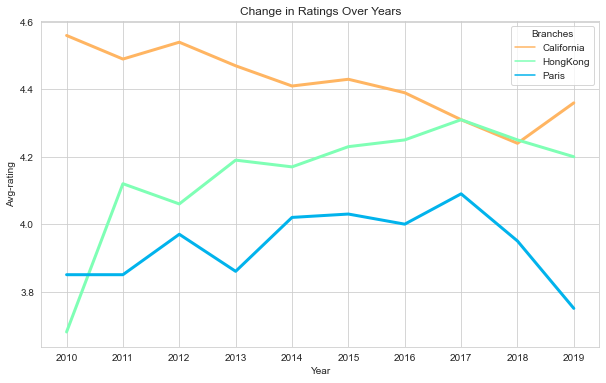

In [257]:
# Create Figure
fig, ax = plt.subplots(figsize=(10,6))

ax =sns.lineplot(x='Year', y='Avg-rating', hue='Branches', palette= 'rainbow_r', lw=3,
                 data = avg_rating_year.melt('Year', var_name='Branches', value_name='Avg-rating')).set_title('Change in Ratings Over Years')


### Total Rateing year wise 

In [258]:
reviews_per_year = pd.DataFrame(Disneyland.groupby(["Branch",'Year']).agg({'Rating': ['count']})).round(2)
reviews_per_year = reviews_per_year.unstack().T.reset_index().drop(columns=['level_0','level_1'])

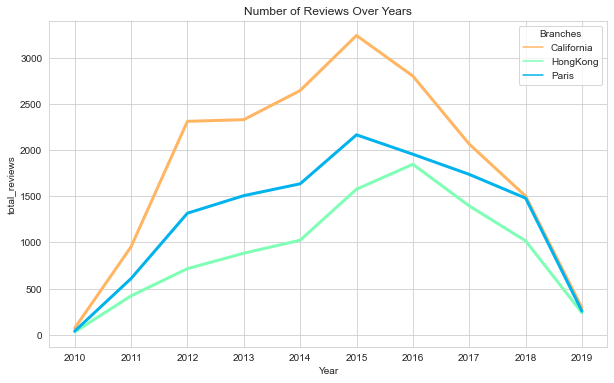

In [259]:
# Create Figure
fig, ax = plt.subplots(figsize=(10,6))

ax =sns.lineplot(x='Year', y='total_reviews', hue='Branches', palette= 'rainbow_r', lw=3,
                 data = reviews_per_year.melt('Year', var_name='Branches', value_name='total_reviews')).set_title('Number of Reviews Over Years')

### Total Rateing year wise 

In [260]:
reviews_per_year = pd.DataFrame(Disneyland.groupby(["Branch",'Year']).agg({'Rating': ['count']})).round(2)
reviews_per_year = reviews_per_year.unstack().T.reset_index().drop(columns=['level_0','level_1'])

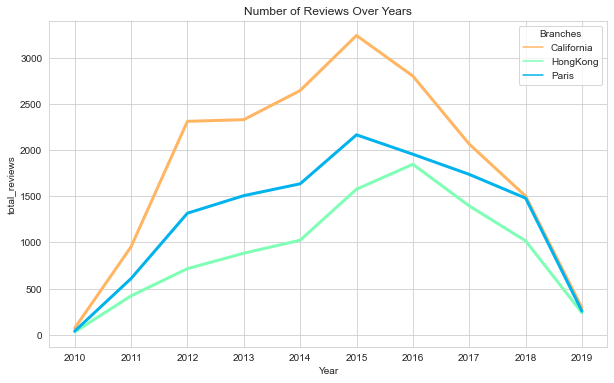

In [261]:
# Create Figure
fig, ax = plt.subplots(figsize=(10,6))

ax =sns.lineplot(x='Year', y='total_reviews', hue='Branches', palette= 'rainbow_r', lw=3,
                 data = reviews_per_year.melt('Year', var_name='Branches', value_name='total_reviews')).set_title('Number of Reviews Over Years')

# Rating distribution among location 

In [262]:
rating_count = pd.DataFrame(Disneyland.groupby("Branch")["Rating"].value_counts())

In [263]:
rating_count = rating_count.unstack().T.reset_index().drop(columns=['level_0'])

In [264]:
rating_count

Branch,Rating,California,HongKong,Paris
0,1,499,172,828
1,2,747,336,1044
2,3,1661,1365,2083
3,4,3981,3230,3564
4,5,12518,4517,6111


#### viewing in percentage 

In [265]:
for column in ['California','HongKong','Paris']:
    rating_count[column]  = rating_count[column].apply(lambda row: row/rating_count[column].sum()*100).round(0)

rating_count

Branch,Rating,California,HongKong,Paris
0,1,3.0,2.0,6.0
1,2,4.0,3.0,8.0
2,3,9.0,14.0,15.0
3,4,21.0,34.0,26.0
4,5,65.0,47.0,45.0


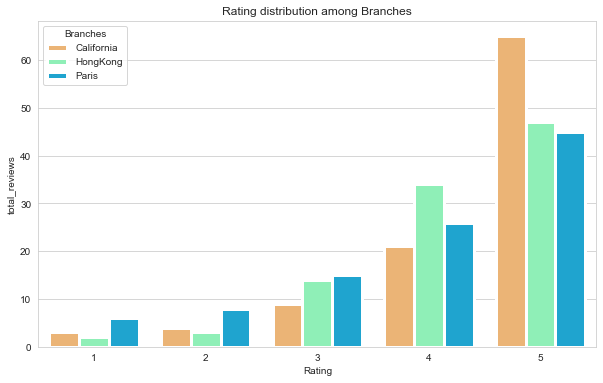

In [266]:
# Create Figure
fig, ax = plt.subplots(figsize=(10,6))

ax =sns.barplot(x='Rating', y='total_reviews', hue='Branches', palette= 'rainbow_r', lw=3,
                 data = rating_count.melt('Rating', var_name='Branches', value_name='total_reviews')).set_title('Rating distribution among Branches')

# Visualize where visitor are from 

Top 10 review locations for Disnelyland branch in California


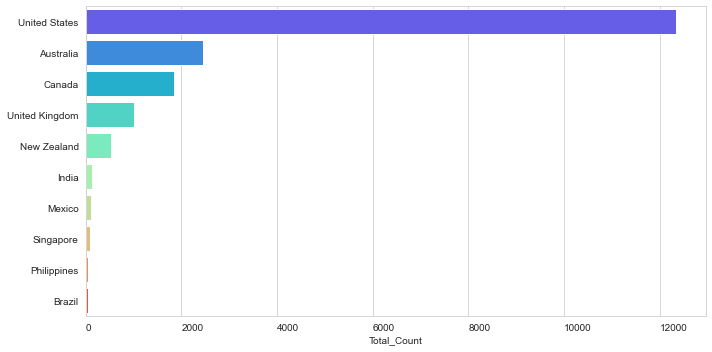

Top 10 review locations for Disnelyland branch in Paris


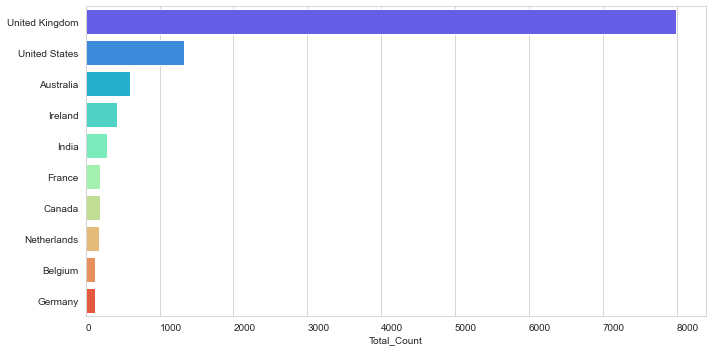

Top 10 review locations for Disnelyland branch in HongKong


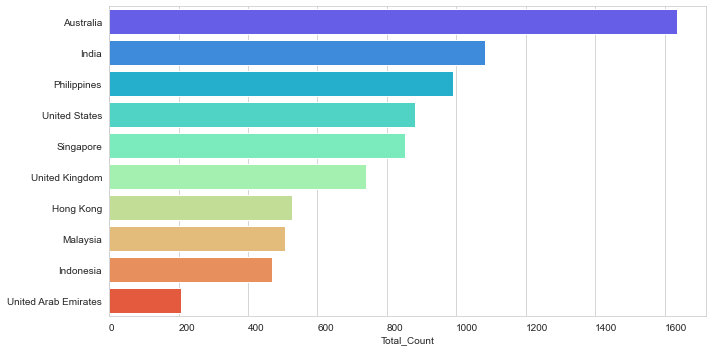

In [267]:
for branch in ['California', 'Paris', 'HongKong']:
    count_uniques = pd.DataFrame(Disneyland.groupby('Branch').get_group(branch)['Reviewer_Location'].value_counts().iloc[:10]).rename(columns={'Reviewer_Location':'Total_Count'}).sort_values('Total_Count',ascending=False)
    print(color.BOLD +"Top 10 review locations for Disnelyland branch in {}".format(branch)+ color.END)

    # Create Figure
    fig, ax = plt.subplots(figsize=(10,5))

    ax = sns.barplot(y=count_uniques.index.values.tolist()  , x="Total_Count", data=count_uniques, palette= 'rainbow')
    # rotates labels and aligns them horizontally to left 
    plt.setp( ax.xaxis.get_majorticklabels(), ha="left" )

    plt.tight_layout()
    plt.show()

# WORD CLOUDS

These word clouds have a general idea of what visitors talk about their visit to Disneyland in their review. Only English reviews are considered also duplicate reviews are removed. To create the word clouds, we tokenized words and removed stopwords.

In [268]:
def generate_branch_wordcloud(branch, img):
    branch_data =  Disneyland.loc[Disneyland['Branch'] == branch]
    
    text = " ".join(review for review in branch_data.Review_Text)
    
    tokenizer = RegexpTokenizer(r'\w+')
    text = text.lower()
    cleaned_text = re.sub('\W', ' ', text)
    stopword = stopwords.words("english")
    snowball_stemmer = SnowballStemmer("english")
    word_tokens = nltk.word_tokenize(cleaned_text)
    stemmed_word = [snowball_stemmer.stem(word) for word in word_tokens]
    stopword_text = [word for word in stemmed_word if word not in stopword]
        
    #remove custom stop words
    my_stopwords = ['park', 'disney', 'disneyland', 'disney land', 'disney world',
                    'disneyworld', 'california', 'hong kong', 'paris']
    processed_text = [word for word in stopword_text if word not in my_stopwords]
    
    freq = FreqDist(processed_text)
    freq.plot(20);
    
    text_string=(" ").join(processed_text)
    
    mask = np.array(Image.open(img))
    wordcloud = WordCloud(background_color="white", font_path='arial', max_words=200,
                          mask=mask, contour_color='grey', contour_width=1).generate(text_string)
    image_colors = ImageColorGenerator(mask)

    plt.figure(figsize=(13,10))
    
    plt.imshow(wordcloud.recolor(),interpolation="bilinear")
    plt.axis("off")
    
    plt.show()

Frequency plot and wordcloud for reviews for Disneyland in California


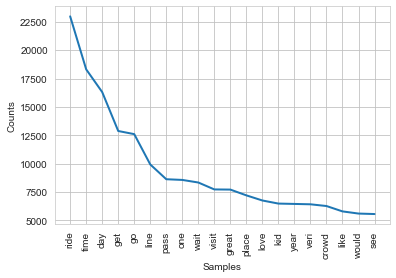

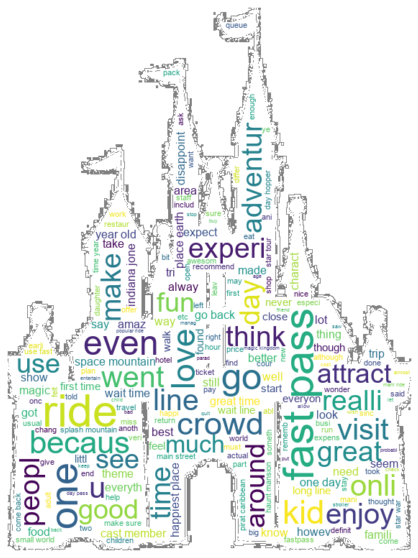

Frequency plot and wordcloud for reviews for Disneyland in Paris


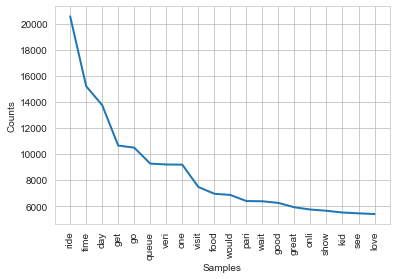

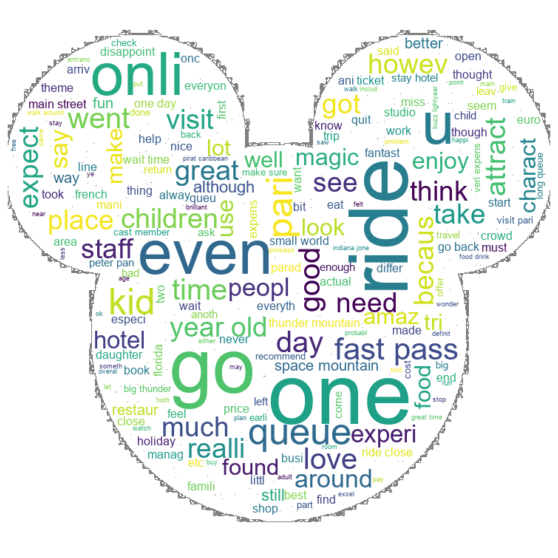

Frequency plot and wordcloud for reviews for Disneyland in HongKong


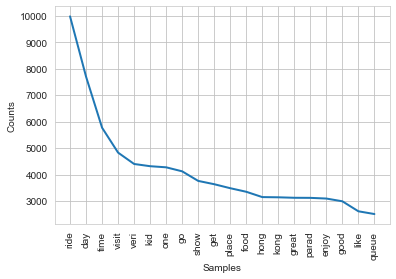

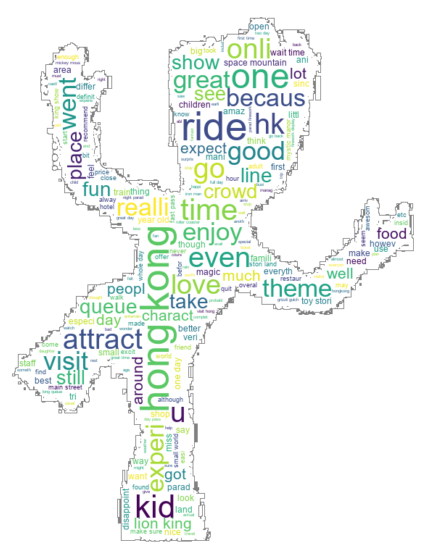

In [269]:
branches=['California','Paris','HongKong']
images=['kingdom.jpg', 'mickey.jpg', 'groot.jpg' ]
for branch,image in zip(branches,images):
    print(color.BOLD +"Frequency plot and wordcloud for reviews for Disneyland in {}".format(branch)+ color.END)
    generate_branch_wordcloud(branch, image)

# USING N GRAMS TO FIND WORDS PATTERNS 

In [11]:
Disneyland.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",HongKong


In [12]:
Disneyland.drop(["Review_ID"],axis =1 , inplace = True )

In [13]:
df = Disneyland.copy()

In [14]:
df = df[df['Year_Month'] != "missing"]
df['year'] = pd.DatetimeIndex(df['Year_Month']).year
df['year'] = pd.to_numeric(df['year'])
df['month'] = pd.DatetimeIndex(df['Year_Month']).month
df['month'] = pd.to_numeric(df['month'])
df.drop('Year_Month', axis=1, inplace = True)
df = df.reset_index(drop=True)
df.head(5)

,Rating,Reviewer_Location,Review_Text,Branch,year,month
0,4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,2019,4
1,4,Philippines,Its been a while since d last time we visit HK...,HongKong,2019,5
2,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong,2019,4
3,4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong,2019,4
4,4,United Kingdom,"the location is not in the city, took around 1...",HongKong,2019,4


### first extract review ony 

In [18]:
# change type to string
reviews = df["Review_Text"].astype("str")

In [19]:
reviews.head()

0    If you've ever been to Disneyland anywhere you...
1    Its been a while since d last time we visit HK...
2    Thanks God it wasn   t too hot or too humid wh...
3    HK Disneyland is a great compact park. Unfortu...
4    the location is not in the city, took around 1...
Name: Review_Text, dtype: object

# Pre-processing 

In [22]:
def _removeNonAscii(s):
    """
    Remove non-ASCII characters from the input string
    """
    return "".join(i for i in s if ord(i) < 128)

In [23]:
STOPWORDS_DICT = {lang: set(nltk.corpus.stopwords.words(lang)) for lang in nltk.corpus.stopwords.fileids()}

def get_language(text):
    """
    Determine if the input text is in English based on the presence of English stop words.
    """
    # Remove non-ASCII characters from the text
    text = _removeNonAscii(text)
    # Tokenize the text and convert to lowercase
    words = set(nltk.wordpunct_tokenize(text.lower()))
    # Find the language with the most stop words in common with the text
    lang = max(((lang, len(words & stopwords)) for lang, stopwords in STOPWORDS_DICT.items()), key = lambda x: x[1])[0]
    # Return True if the language is English, False otherwise
    return lang == 'english'

In [24]:
eng_rev = reviews[reviews.apply(get_language)]
#eng_rev.head()
print(len(eng_rev)) #5 reviews not in english

564


In [25]:
#remove duplicates if any
eng_rev.drop_duplicates(inplace=True)
len(eng_rev) 

563

In [26]:
import spacy
# Load English tokenizer, tagger, parser and NER
nlp = spacy.load("en_core_web_sm")

In [27]:
#lemmatize
def clean_comments(text):
    #remove punctuations
    regex = re.compile('[' + re.escape(string.punctuation) + '\\r\\t\\n]')
    nopunct = regex.sub(" ", str(text))
    #use spacy to lemmatize comments
    doc = nlp(nopunct, disable=['parser','ner'])
    lemmatized = [token.lemma_ for token in doc]
    return lemmatized

In [28]:
#apply function to clean and lemmatize comments
lemm = eng_rev.map(clean_comments)

#lowercase words
lemm = lemm.map(lambda x: [word.lower() for word in x])

In [29]:
lemm

154      [magical,  , fun, time, at, disneyland,  , we,...
178      [enter, the, hk, disneyland, tend, to, bring, ...
216      [very, small, disneyland, compare, to, the, ot...
271      [it, s, great, to, visit, disneyland,  , don, ...
358      [my, kid, very, enjoy, it, especially, mytic, ...
                               ...                        
39621    [parade, be, excellent, at, night,  , with, th...
39652    [brilliant, parade, and, ride,  , once, again,...
39660    [lovely, time,  , 2nd, time, here,  , great, r...
39709    [enjoy, this, immensely, but, find, it, very, ...
39710    [free, shuttle, bus, there, and, back,  , euro...
Name: Review_Text, Length: 563, dtype: object

In [30]:
#turn all comments' tokens into one single list
unlist_rev = [item for items in lemm for item in items]



In [31]:
unlist_rev = [x.strip('') for x in unlist_rev]

In [32]:
unlist_rev

['magical',
 ' ',
 'fun',
 'time',
 'at',
 'disneyland',
 ' ',
 'we',
 'have',
 '2',
 'wonderful',
 'day',
 'here',
 ' ',
 'all',
 'staff',
 'make',
 'the',
 'visit',
 'extra',
 'special',
 'as',
 'they',
 'be',
 'so',
 'kind',
 'and',
 'patient',
 '  ',
 'unfortunately',
 'we',
 'be',
 'disappointed',
 'to',
 'find',
 'the',
 'firework',
 'be',
 'cancel',
 'both',
 'night',
 'we',
 'be',
 'there',
 ' ',
 'no',
 'warning',
 'or',
 'explanation',
 'enter',
 'the',
 'hk',
 'disneyland',
 'tend',
 'to',
 'bring',
 'back',
 'the',
 'child',
 'in',
 'you',
 ' ',
 'while',
 'inside',
 'you',
 'll',
 'forget',
 'your',
 'life',
 's',
 'problem',
 'and',
 'if',
 'magically',
 'you',
 're',
 'in',
 'a',
 'different',
 'world',
 'full',
 'of',
 'fun',
 'and',
 'fantasy',
 ' ',
 'i',
 'love',
 'the',
 'ride',
 'but',
 'very',
 'few',
 'restaurant',
 'to',
 'choose',
 'from',
 'very',
 'small',
 'disneyland',
 'compare',
 'to',
 'the',
 'other',
 'country',
 ' ',
 'beautiful',
 'disney',
 'theme',

In [33]:
#remove stopwords
stop_words = set(stopwords.words('english')) 
  
cleaned_rev = [w for w in unlist_rev if not w in stop_words] 

#remove spaces
cleaned_rev = [w for w in cleaned_rev if w != ' '] 
cleaned_rev = [w for w in cleaned_rev if w != '  '] 
cleaned_rev = [w for w in cleaned_rev if w != '   ']
#cleaned_rev

In [34]:
cleaned_rev

['magical',
 'fun',
 'time',
 'disneyland',
 '2',
 'wonderful',
 'day',
 'staff',
 'make',
 'visit',
 'extra',
 'special',
 'kind',
 'patient',
 'unfortunately',
 'disappointed',
 'find',
 'firework',
 'cancel',
 'night',
 'warning',
 'explanation',
 'enter',
 'hk',
 'disneyland',
 'tend',
 'bring',
 'back',
 'child',
 'inside',
 'forget',
 'life',
 'problem',
 'magically',
 'different',
 'world',
 'full',
 'fun',
 'fantasy',
 'love',
 'ride',
 'restaurant',
 'choose',
 'small',
 'disneyland',
 'compare',
 'country',
 'beautiful',
 'disney',
 'theme',
 'train',
 'reach',
 'park',
 'big',
 'disappointment',
 'due',
 'disney',
 'castle',
 'close',
 'firework',
 'friendly',
 'staff',
 'helpful',
 'great',
 'visit',
 'disneyland',
 'miss',
 'spectacular',
 'show',
 'wish',
 'add',
 'thrill',
 'ride',
 'kid',
 'enjoy',
 'especially',
 'mytic',
 'monor',
 'lion',
 'king',
 'show',
 'story',
 'book',
 'show',
 'show',
 'superb',
 'wonderful',
 'time',
 'hong',
 'kong',
 'disneyland',
 'full',

# Using m gram to find word patterns 

In [35]:
bigrams = nltk.collocations.BigramAssocMeasures()
trigrams = nltk.collocations.TrigramAssocMeasures()

bigramFinder = nltk.collocations.BigramCollocationFinder.from_words(cleaned_rev)
trigramFinder = nltk.collocations.TrigramCollocationFinder.from_words(cleaned_rev)

# bigrams

In [36]:
bigram_freq = bigramFinder.ngram_fd.items()

In [37]:
bigramFreqTable = pd.DataFrame(list(bigram_freq), columns=['bigram','freq']).sort_values(by='freq', ascending=False)

In [38]:
bigramFreqTable.head(30).reset_index(drop=True)

,bigram,freq
0,"(great, time)",43
1,"(happy, place)",33
2,"(place, earth)",32
3,"(love, disneyland)",24
4,"(theme, park)",20
5,"(hong, kong)",20
6,"(fast, pass)",20
7,"(ride, great)",19
8,"(small, world)",14
9,"(great, place)",14


In [39]:
#might be more meaningful if we can get adjectives and nouns 

#function to filter for ADJ/NN bigrams

def rightTypes(ngram):
    if '-pron-' in ngram or '' in ngram or ' 'in ngram or 't' in ngram:
        return False
    for word in ngram:
        if word in stop_words:
            return False
    acceptable_types = ('JJ', 'JJR', 'JJS', 'NN', 'NNS', 'NNP', 'NNPS')
    second_type = ('NN', 'NNS', 'NNP', 'NNPS')
    tags = nltk.pos_tag(ngram)
    if tags[0][1] in acceptable_types and tags[1][1] in second_type:
        return True
    else:
        return False

In [40]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\prakash kotian\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [41]:
#takes awhile to run
bigram_filter = bigramFreqTable[bigramFreqTable.bigram.map(lambda x: rightTypes(x))]
bigram_filter.head(10)

,bigram,freq
218,"(great, time)",43
278,"(happy, place)",33
98,"(place, earth)",32
373,"(love, disneyland)",24
239,"(theme, park)",20
88,"(hong, kong)",20
1433,"(small, world)",14
145,"(great, place)",14
545,"(space, mountain)",14
1823,"(indiana, jones)",13


In [42]:
test_string = bigram_filter['bigram'].tolist()
test_string[1]
#type(test_string)
#combine tuple
test_string[1][0] +'_' + test_string[1][1] 

#combine all tuples in df
bigram = [ ]
for c in range(0, len(test_string)):
    bigram.append(test_string[c][0] +'_' + test_string[c][1]) 

bigram_filter['bigram_combo'] = bigram

In [43]:
top20_bigram = bigram_filter[:20]

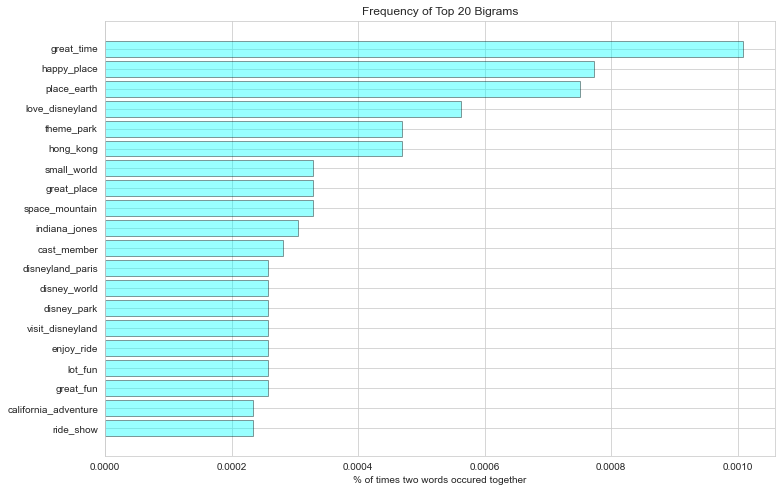

In [44]:
# Create Figure
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(12,8))
plt.barh(top20_bigram['bigram_combo'], top20_bigram['freq']/len(Disneyland), color ='cyan', alpha = 0.4, 
         edgecolor = 'black', linewidth = 1)
plt.xlabel("% of times two words occured together")
plt.gca().invert_yaxis()
plt.title("Frequency of Top 20 Bigrams")
#plt.savefig("output\disney_topbigram.jpg", bbox_inches='tight', dpi = 300)
plt.show()

# Trigrams

In [45]:
trigram_freq = trigramFinder.ngram_fd.items()
trigramFreqTable = pd.DataFrame(list(trigram_freq), columns=['trigram','freq']).sort_values(by='freq', ascending=False)
trigramFreqTable.head(5).reset_index(drop=True)

,trigram,freq
0,"(happy, place, earth)",28
1,"(place, earth, happy)",14
2,"(earth, happy, place)",14
3,"(disneyland, happy, place)",6
4,"(hong, kong, disneyland)",6


In [46]:
#filter NN and ADJ in trigrams
def rightTypesTri(ngram):
    if '-pron-' in ngram or '' in ngram or ' 'in ngram or '  ' in ngram or 't' in ngram:
        return False
    for word in ngram:
        if word in stop_words:
            return False
    first_type = ('JJ', 'JJR', 'JJS', 'NN', 'NNS', 'NNP', 'NNPS')
    third_type = ('JJ', 'JJR', 'JJS', 'NN', 'NNS', 'NNP', 'NNPS')
    tags = nltk.pos_tag(ngram)
    if tags[0][1] in first_type and tags[2][1] in third_type:
        return True
    else:
        return False

In [47]:
trigram_filter = trigramFreqTable[trigramFreqTable.trigram.map(lambda x: rightTypesTri(x))]
trigram_filter.head(10)


,trigram,freq
1172,"(happy, place, earth)",28
4449,"(place, earth, happy)",14
4450,"(earth, happy, place)",14
1171,"(disneyland, happy, place)",6
1933,"(staff, friendly, helpful)",6
2650,"(mountain, indiana, jones)",5
4277,"(disneyland, california, adventure)",5
222,"(great, time, family)",5
3261,"(great, time, visit)",5
78,"(lion, king, show)",4


In [48]:
test_string2 = trigram_filter['trigram'].tolist()

trigram = [ ]
for c in range(0, len(test_string2)):
    trigram.append(test_string2[c][0] + '_' + test_string2[c][1] + '_' + test_string2[c][2]) 

trigram_filter['trigram_combo'] = trigram
top20_trigram = trigram_filter[:20]

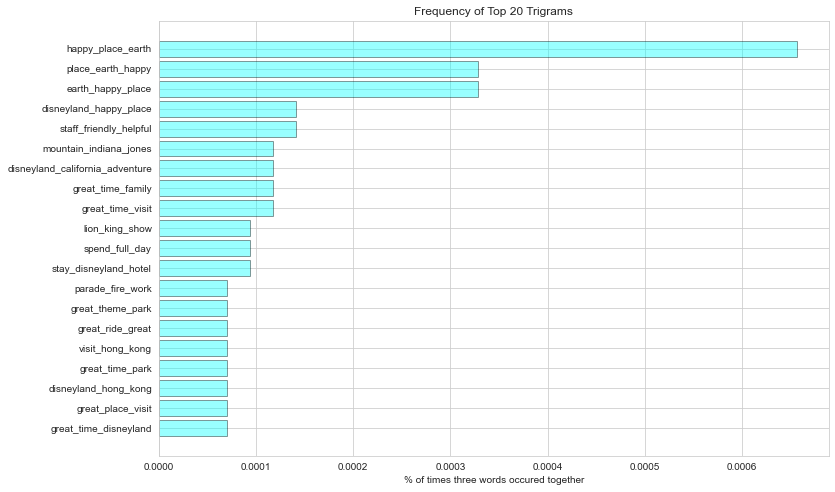

In [49]:
# Create Figure
fig, ax = plt.subplots(figsize=(12,8))
#plot frequency of trigram that occurs out of all ca reviews
plt.barh(top20_trigram['trigram_combo'], top20_trigram['freq']/len(Disneyland), color ='cyan', alpha = 0.4, 
         edgecolor = 'black', linewidth = 1)
plt.xlabel("% of times three words occured together")
plt.gca().invert_yaxis()
#plt.ylabel("Counts")
plt.title("Frequency of Top 20 Trigrams")
#plt.savefig("output\disney_hk_toptrigram.jpg", bbox_inches='tight', dpi = 300)
plt.show()

Trigram show a lot of rides! Which rides/attractions they went to, what kind of tickets they purchased, duration of stay/visit

Compare what visitors are saying about rides from each park;

Anaheim - space_mountain, indiana_jones, splash_mountain, small_world

Paris - space_mountain, (big) thunder_mountain, small_world, peter pan, sleeping beauty

HK - lion_king, grizzly mountain, toy story

# Sentiment Analysis 

# World Clouds 

These word clouds have a general idea of what visitors talk about their visit to Disneyland in their review. Only English reviews are considered also duplicate reviews are removed. To create the word clouds, we tokenized words and removed stopwords.

In [51]:
stopwords = nltk.corpus.stopwords.words("english")
stopword_text = [word for word in cleaned_rev if word not in stopwords]

#remove custom stop words
my_stopwords = ['park', 'disney', 'disneyland', 'disney land', 'disney world',  'disneyworld',
                'tokyo','paris', 'anaheim','california', 'hong kong','kong', 'hong', 'wa']
processed_text = [word for word in stopword_text if word not in my_stopwords]

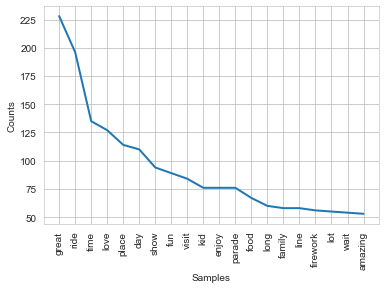

In [52]:
freq = FreqDist(processed_text)
freq.plot(20);

fdist_df = pd.DataFrame.from_dict(freq, orient='index')
fdist_df.columns = ['Frequency']
fdist_df = fdist_df.sort_values(by='Frequency', ascending=False)[:10]

In [53]:
fdist_df

,Frequency
great,228
ride,196
time,135
love,127
place,114
day,110
show,94
fun,89
visit,84
parade,76


In [54]:
text_string=(" ").join(processed_text)

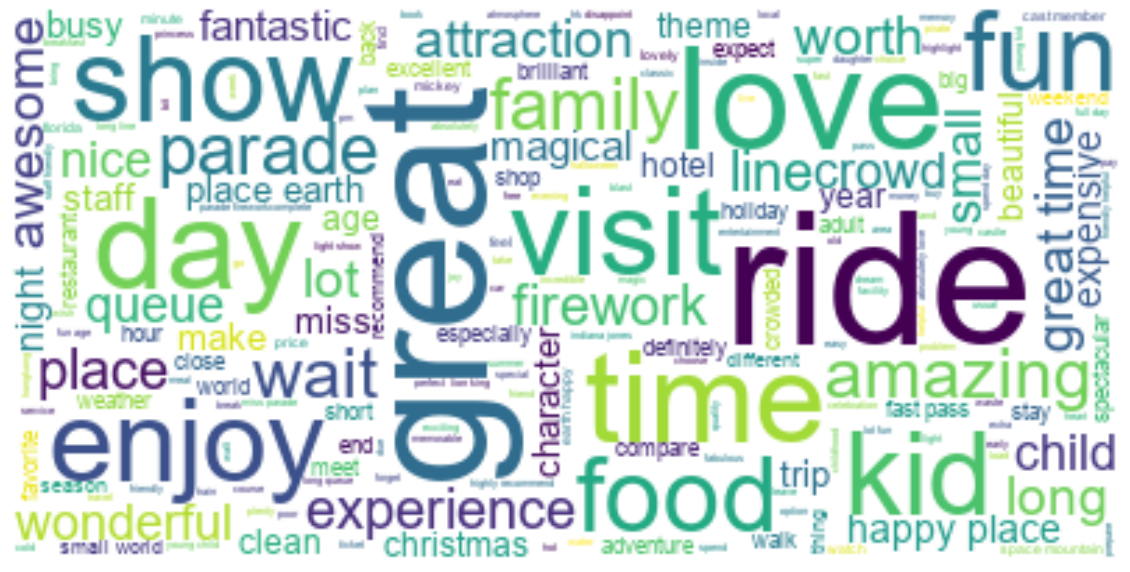

In [57]:

wordcloud = WordCloud(background_color="white", font_path='arial', max_words=200,
 contour_color='blue', contour_width=2).generate(text_string)


plt.figure(figsize=(20,15))
plt.imshow(wordcloud.recolor(),interpolation="bilinear")
#plt.imshow(wordcloud.recolor(color_func=image_colors),interpolation="bilinear")
plt.axis("off")
#plt.savefig("Disneyland"+".jpg", bbox_inches='tight', dpi = 300)
plt.show()

# TextBlob and vader

## Sentiment Polarity -
It is the expression that determines the sentimental aspect of an opinion. In textual data, the result of sentiment analysis can be determined for each entity in the sentence, document or sentence. The sentiment polarity can be determined as positive, negative and neutral. Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.

## Sentiment Subjectivity- 
Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information. Subjectivity is also a float which lies in the range of [0,1].

In [58]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def detect_tb_polarity(text):
    return TextBlob(text).sentiment.polarity

def detect_tb_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def detect_vader_pos(text):
    return vader.polarity_scores(text)['pos']

def detect_vader_neg(text):
    return vader.polarity_scores(text)['neg']

def detect_vader_comp(text):
    return vader.polarity_scores(text)['compound']

In [59]:
df['tb_polarity'] = df.Review_Text.apply(detect_tb_polarity)
df['tb_subjectivity'] = df.Review_Text.apply(detect_tb_subjectivity)

vader = SentimentIntensityAnalyzer()
df['vader_pos'] = df.Review_Text.apply(detect_vader_pos)
df['vader_neg'] = df.Review_Text.apply(detect_vader_neg)
df['vader_comp'] = df.Review_Text.apply(detect_vader_comp)

In [60]:
#assign sentiment based on compound score
df['sentiment'] = np.where(df['vader_comp'] >= 0.05, 'positive', 'negative')

In [61]:
df.head(10)

,Rating,Reviewer_Location,Review_Text,Branch,year,month,tb_polarity,tb_subjectivity,vader_pos,vader_neg,vader_comp,sentiment
0,4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,2019,4,0.243981,0.561481,0.109,0.000,0.7069,positive
1,4,Philippines,Its been a while since d last time we visit HK...,HongKong,2019,5,0.236131,0.434649,0.195,0.044,0.9853,positive
2,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong,2019,4,0.160498,0.422944,0.220,0.022,0.9920,positive
3,4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong,2019,4,0.189286,0.512143,0.154,0.078,0.8425,positive
4,4,United Kingdom,"the location is not in the city, took around 1...",HongKong,2019,4,0.266667,0.437500,0.098,0.000,0.2846,positive
5,3,Singapore,"Have been to Disney World, Disneyland Anaheim ...",HongKong,2019,4,-0.065476,0.610397,0.154,0.088,0.9311,positive
6,5,India,Great place! Your day will go by and you won't...,HongKong,2019,4,0.185000,0.590000,0.220,0.087,0.7489,positive
7,3,Malaysia,Think of it as an intro to Disney magic for th...,HongKong,2019,3,0.054722,0.500556,0.109,0.030,0.8345,positive
8,2,Australia,"Feel so let down with this place,the Disneylan...",HongKong,2019,4,-0.067284,0.482099,0.095,0.074,0.5195,positive
9,5,India,I can go on talking about Disneyland. Whatever...,HongKong,2019,3,0.204497,0.394974,0.152,0.041,0.9434,positive


In [62]:
df['Review_Text'][17]

"Around   60 per person and if you want to eat or drink at any point it was cost you a small fortune. If you go on a week day like we did I assume like us you will wait around half an hour per ride. At the time we went the Disney castle was under construction.. it doesn't look like it will be finished soon. Fast track is free for everyone but single rider was a lot faster. An average day at an expensive place. "

In [63]:
df['sentiment'].value_counts()

positive    35478
negative     4565
Name: sentiment, dtype: int64

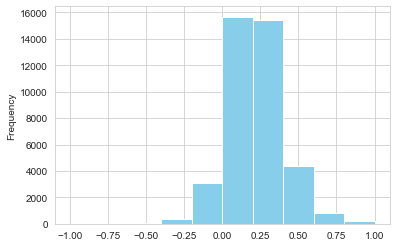

In [66]:
df["tb_polarity"].plot.hist(color='skyblue');

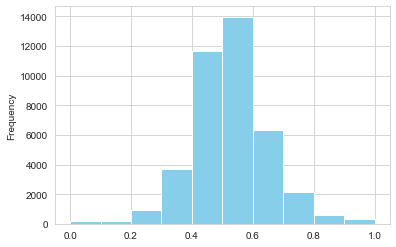

In [67]:
df["tb_subjectivity"].plot.hist(color='skyblue');

In [69]:
df['tb_Sentiment_Type'] = ''
df.loc[df["tb_polarity"]>0,'tb_Sentiment_Type']='POSITIVE'
df.loc[df["tb_polarity"]==0,'tb_Sentiment_Type']='NEUTRAL'
df.loc[df["tb_polarity"]<0,'tb_Sentiment_Type']='NEGATIVE'

<AxesSubplot:>

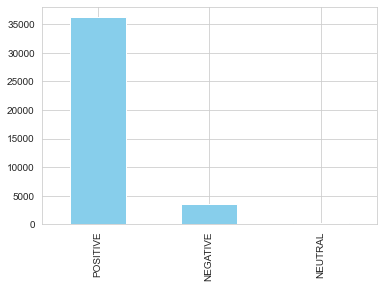

In [71]:
df['tb_Sentiment_Type'].value_counts().plot.bar(color='skyblue')

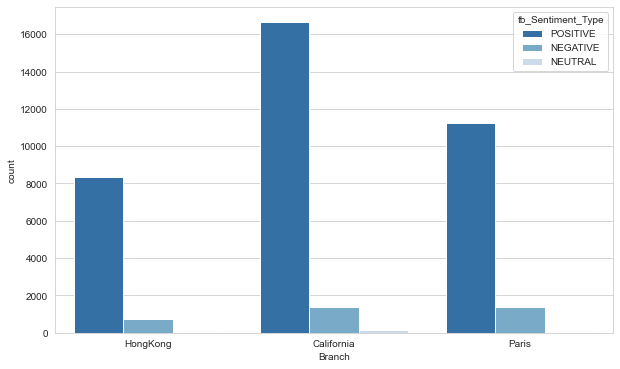

In [72]:
# Sentiment type by branch
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Branch',hue='tb_Sentiment_Type',palette='Blues_r');

# Vader 

<AxesSubplot:>

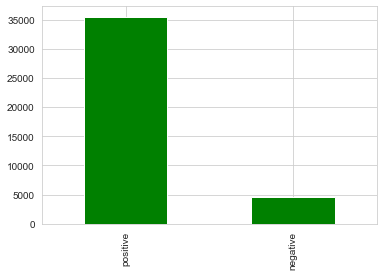

In [77]:
df['sentiment'].value_counts().plot.bar(color='green')

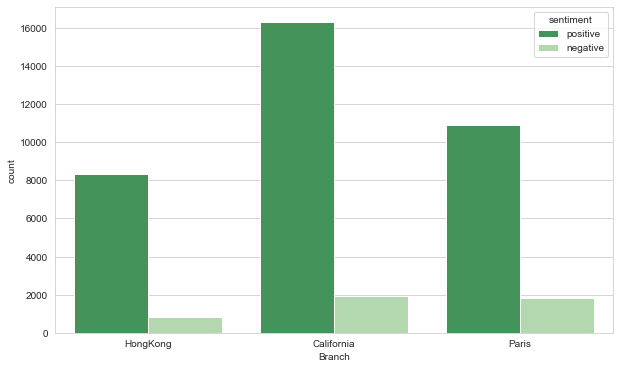

In [78]:
# Sentiment type by branch
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Branch',hue='sentiment',palette='Greens_r');

# Emotion Analysis
Emotion Detection: We assigned emotions using NRCLex, which measures emotional affect based on text. The emotional affects include: positive, negative, anticipation, trust, fear, surprise, anger, sadness, joy, and disgust

In [82]:
from nrclex import NRCLex

In [83]:
emotion = []
for i in range(len(df)):
    emotions = NRCLex(df['Review_Text'][i])
    emotion.append(emotions.top_emotions[0][0])
df['emotion'] = emotion
df.head()    

,Rating,Reviewer_Location,Review_Text,Branch,year,month,tb_polarity,tb_subjectivity,vader_pos,vader_neg,vader_comp,sentiment,tb_Sentiment_Type,emotion
0,4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,2019,4,0.243981,0.561481,0.109,0.000,0.7069,positive,POSITIVE,positive
1,4,Philippines,Its been a while since d last time we visit HK...,HongKong,2019,5,0.236131,0.434649,0.195,0.044,0.9853,positive,POSITIVE,positive
2,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong,2019,4,0.160498,0.422944,0.220,0.022,0.9920,positive,POSITIVE,positive
3,4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong,2019,4,0.189286,0.512143,0.154,0.078,0.8425,positive,POSITIVE,positive
4,4,United Kingdom,"the location is not in the city, took around 1...",HongKong,2019,4,0.266667,0.437500,0.098,0.000,0.2846,positive,POSITIVE,anger


In [84]:
df['emotion'].value_counts()

positive        25792
anticipation     5194
trust            3502
negative         2199
fear             1885
surprise          938
anger             472
sadness            40
joy                17
disgust             4
Name: emotion, dtype: int64

In [85]:
def emotionbranch(branch):
    plt.figure(figsize=(10,5))

    data_ = df[df["Branch"]== branch]

    graph = sns.countplot(y="emotion", data=data_, palette="Set2");
    graph.set(xlabel='Frequency', ylabel='Emotion', title = 'Emotion from reviews about Disneyland {}'.format(branch));

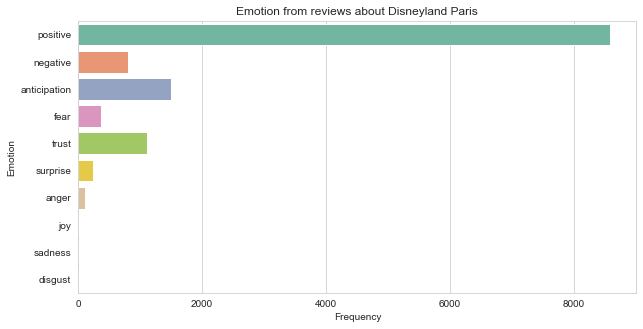

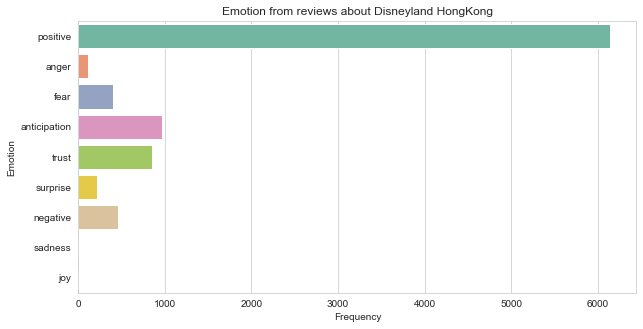

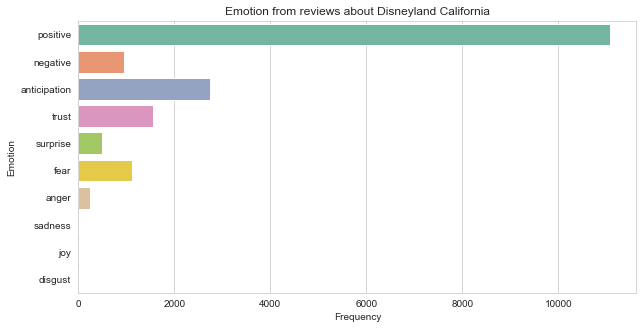

In [86]:
for branch in ['Paris', 'HongKong', 'California']:
    emotionbranch(branch)

Overall, all three parks have a high frequency of “positive” emotion. However, we have to take a closer look at reviews associated to negative emotions (anger, fear, negative, disgust, sadness) so that we can have an idea of why some visitors had an unpleasant park experience.

# Concordance & Collocations
In the context of NLP, a concordance is a collection of word locations along with their context. You can use concordances to find:

How many times a word appears?

Where each occurrence appears?

What words surround each occurrence?

In [87]:
#ride
text_ = nltk.Text(processed_text)
text_.concordance("ride", lines=10)

Displaying 10 of 196 matches:
ifferent world full fun fantasy love ride restaurant choose small compare coun
iss spectacular show wish add thrill ride kid enjoy especially mytic monor lio
night parade beautiful miss majority ride shame ride minimum 50 60 minute wait
e beautiful miss majority ride shame ride minimum 50 60 minute wait time spend
rfect weather visit enjoy walk theme ride fun safe queue long fast move enjoy 
 long queue worthe perfect young kid ride suit young kid lion king show great 
ght perfect getaway family day loads ride activity adult kid buy ticket online
artoon character expect high quality ride show standard expensive food souveni
expensive food inside premise choice ride long queue last hour crowded miss vi
l train station goer attractive term ride u shaped ride big grizzly mountain r


# Collocation 

Collocations are series of words that frequently appear together in a given text.

In the State of the Union corpus, for example, you’d expect to find the words United and States appearing next to each other very often. Those two words appearing together is a collocation.

In [88]:
#ride
finder = nltk.collocations.TrigramCollocationFinder.from_words(text_)
finder.ngram_fd.most_common(10)

[(('happy', 'place', 'earth'), 28),
 (('place', 'earth', 'happy'), 14),
 (('earth', 'happy', 'place'), 14),
 (('staff', 'friendly', 'helpful'), 6),
 (('great', 'time', 'family'), 5),
 (('indiana', 'jones', 'ride'), 5),
 (('mountain', 'indiana', 'jones'), 5),
 (('fast', 'pass', 'great'), 5),
 (('great', 'time', 'visit'), 5),
 (('lion', 'king', 'show'), 4)]

In [89]:
from nltk.metrics import TrigramAssocMeasures

finder.nbest(TrigramAssocMeasures.likelihood_ratio, 15)

[('happy', 'place', 'earth'),
 ('place', 'earth', 'happy'),
 ('earth', 'happy', 'place'),
 ('happiest', 'place', 'earth'),
 ('place', 'earth', 'castmember'),
 ('place', 'earth', 'exceptionally'),
 ('place', 'earth', 'steam'),
 ('place', 'earth', 'thrusday'),
 ('place', 'earth', 'woooooooooow'),
 ('place', 'earth', 'ambiance'),
 ('place', 'earth', 'indeed'),
 ('place', 'earth', 'fun'),
 ('place', 'earth', 'meal'),
 ('place', 'earth', '     '),
 ('place', 'earth', 'hk')]

# TOPIC MODELLING 

Topic modeling is a technique to extract the underlying topics from large volumes of text.

We can use topic modeling to extract keywords used in reviews to help Disney identify specific issues that concern park visitors. We can build a dictionary and train our topic model using an unsupervised learning algorithm, LDA (Latent Dirichlet Allocation) to uncover hidden patterns in the text. This will also yield the probabilities of topics appearing in our model. Before building this model, we need to remove punctuations, stopwords, and lemmatized the text. Then, identify best value for k (number of topics) by graphing it against coherence score. Pick ideal k value where the coherence score is at maximum. I used the gensim package for this task

In [90]:
import  numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords 

In [91]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
#By setting up logging for gensim, developers can more easily track errors and other messages that might be generated during the use of the library. 
#This can be particularly useful for debugging and improving the performance of gensim-based applications.

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

C:\ProgramData\Anaconda3\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
C:\Users\prakash kotian\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_online_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [92]:
Disneyland.head()

,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,HongKong
1,4,2019-5,Philippines,Its been a while since d last time we visit HK...,HongKong
2,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong
3,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong
4,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",HongKong


In [93]:
Disneyland.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42656 entries, 0 to 42655
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Rating             42656 non-null  int64 
 1   Year_Month         42656 non-null  object
 2   Reviewer_Location  42656 non-null  object
 3   Review_Text        42656 non-null  object
 4   Branch             42656 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.0+ MB


In [94]:
def sent_to_words(sentences):
    for  sentence  in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data = Disneyland.Review_Text.values.tolist()
# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]
data_words = list(sent_to_words(data))


In [95]:
data_words[:1]

[['if',
  'youve',
  'ever',
  'been',
  'to',
  'disneyland',
  'anywhere',
  'youll',
  'find',
  'disneyland',
  'hong',
  'kong',
  'very',
  'similar',
  'in',
  'the',
  'layout',
  'when',
  'you',
  'walk',
  'into',
  'main',
  'street',
  'it',
  'has',
  'very',
  'familiar',
  'feel',
  'one',
  'of',
  'the',
  'rides',
  'its',
  'small',
  'world',
  'is',
  'absolutely',
  'fabulous',
  'and',
  'worth',
  'doing',
  'the',
  'day',
  'we',
  'visited',
  'was',
  'fairly',
  'hot',
  'and',
  'relatively',
  'busy',
  'but',
  'the',
  'queues',
  'moved',
  'fairly',
  'well']]

# Bigram  and  Trigram 

In [96]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)



In [97]:
# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['if', 'youve', 'ever', 'been', 'to', 'disneyland', 'anywhere', 'youll', 'find', 'disneyland_hong_kong', 'very', 'similar', 'in', 'the', 'layout', 'when', 'you', 'walk', 'into', 'main_street', 'it', 'has', 'very', 'familiar', 'feel', 'one', 'of', 'the', 'rides', 'its', 'small', 'world', 'is', 'absolutely', 'fabulous', 'and', 'worth', 'doing', 'the', 'day', 'we', 'visited', 'was', 'fairly', 'hot', 'and', 'relatively', 'busy', 'but', 'the', 'queues', 'moved', 'fairly', 'well']


In [98]:
# See trigram example
print(bigram_mod[bigram_mod[data_words[0]]])

['if', 'youve', 'ever', 'been', 'to', 'disneyland', 'anywhere', 'youll', 'find', 'disneyland', 'hong_kong', 'very', 'similar', 'in', 'the', 'layout', 'when', 'you', 'walk', 'into', 'main_street', 'it', 'has', 'very', 'familiar', 'feel', 'one', 'of', 'the', 'rides', 'its', 'small', 'world', 'is', 'absolutely', 'fabulous', 'and', 'worth', 'doing', 'the', 'day', 'we', 'visited', 'was', 'fairly', 'hot', 'and', 'relatively', 'busy', 'but', 'the', 'queues', 'moved', 'fairly', 'well']


In [99]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [100]:
stop_words = set(stopwords.words('english')) 

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['ve', 'ever', 'disneyland', 'anywhere', 'find', 'similar', 'layout', 'walk', 'main_street', 'familiar', 'feel', 'ride', 'small', 'world', 'absolutely', 'fabulous', 'worth', 'day', 'visit', 'fairly', 'hot', 'relatively', 'busy', 'queue', 'move', 'fairly', 'well']]


In [101]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)


# Create Corpus
texts = data_lemmatized


# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


In [102]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [103]:
# Print the Keyword in the 10 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.040*"drink" + 0.026*"village" + 0.024*"euro" + 0.023*"water" + 0.023*"son" + 0.019*"snack" + 0.017*"princess" + 0.017*"bag" + 0.016*"poor" + 0.012*"bottle"'), (1, '0.035*"staff" + 0.032*"people" + 0.016*"room" + 0.014*"say" + 0.014*"tell" + 0.012*"service" + 0.012*"french" + 0.010*"give" + 0.009*"ask" + 0.009*"pay"'), (2, '0.048*"park" + 0.047*"ride" + 0.038*"go" + 0.033*"get" + 0.027*"time" + 0.019*"disney" + 0.019*"queue" + 0.013*"wait" + 0.011*"long" + 0.010*"hour"'), (3, '0.023*"day" + 0.021*"good" + 0.017*"take" + 0.017*"food" + 0.016*"kid" + 0.016*"great" + 0.015*"hotel" + 0.014*"see" + 0.013*"show" + 0.013*"child"')]


In [104]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.929281097727742

Coherence Score:  0.3757703906003821


In [105]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.230005  0.020797       1        1  44.408831
3     -0.215024  0.158037       2        1  41.937320
1      0.073834 -0.353602       3        1   9.894890
0      0.371195  0.174768       4        1   3.758959, topic_info=        Term          Freq         Total Category  logprob  loglift
17      ride  47736.000000  47736.000000  Default  30.0000  30.0000
65      park  52877.000000  52877.000000  Default  29.0000  29.0000
135       go  43623.000000  43623.000000  Default  28.0000  28.0000
48       get  36806.000000  36806.000000  Default  27.0000  27.0000
176   people  10738.000000  10738.000000  Default  26.0000  26.0000
...      ...           ...           ...      ...      ...      ...
3376   learn    390.418412    390.943380   Topic4  -5.4011   3.2797
6017    euro   2090.758944   3731.446685   Topic4  -3.7231   2.7018
1419   table    863.308496   1468.773371   Topic4  -4.6076   2.7496
327    bring    828.279341   3077.640865   Topic4  -4.6490   1.9685
614      sit    516.369212   1906.783120   Topic4  -5.1215   1.9747

[214 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
397       2  0.999895    adult
681       2  0.999782   always
87        2  0.999882  amazing
126       1  0.671265     area
126       2  0.019903     area
...     ...       ...      ...
24        1  0.999973    world
25        2  0.999936    worth
1696      3  0.999409    write
396       2  0.999944     year
310       2  0.999789    young

[258 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 1])

From our topic model, we were able to obtain top keywords from each topic:

44.4% of tokens about park, rides,go and get.

41.9% of tokens about positive and fun family park experience.

9.9% of tokens about fast passes, restaurant, hotels and bookings.

3.8% of tokens about customer service, maintainance, staff and behaviour.

# CLassification 

In [107]:
Disneyland = pd.read_csv(r"DisneylandReviews.csv",encoding="unicode_escape")
Disneyland.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [109]:
# labeling the data by utilizing the Rating column
rating = Disneyland["Rating"]
def label_func(rating):
    if rating >=4:
        return "Positive"
    elif rating == 3:
            return "Neutral"
    else:
        return "Negative"
        
Disneyland["Sentiment"] = Disneyland["Rating"].apply(lambda x: label_func(x)) 

In [110]:
Disneyland.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Sentiment
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,Positive
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,Positive
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,Positive
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,Positive
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,Positive


In [111]:
df_main = Disneyland.copy()

In [112]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
 6   Sentiment          42656 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.3+ MB


# Text Preprocessing 

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import FreqDist
from nltk.tokenize import RegexpTokenizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
from bs4 import BeautifulSoup
import spacy
#import unidecode
#from word2number import w2n
#import contractions
import en_core_web_sm
import datetime as dt
import regex as re
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
#from fastai.text.all import *
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#import eli5
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [142]:
nlp = spacy.load('en_core_web_sm')

In [143]:
from bs4 import BeautifulSoup

In [144]:
def strip_html_tags(text):
    """remove html tags from text"""
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text(separator="")
    return stripped_text

In [145]:
def remov_stopwords(text):
    stopwords = set(STOPWORDS)
    text = text.replace(str(stopwords),"")
    return text

In [146]:
def remove_whitespace(text):
    """remove extra whitespaces from text"""
    text = text.strip()
    return " ".join(text.split())

In [156]:
pip install Unidecode

     -------------------------------------- 235.9/235.9 kB 4.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [157]:
import unidecode

In [159]:
def remove_accented_chars(text):
    """remove accented characters from text, e.g. café"""
    text = unidecode.unidecode(text)
    return text

In [167]:
!pip install contractions 

     -------------------------------------- 289.9/289.9 kB 8.7 MB/s eta 0:00:00


In [168]:
import contractions

In [169]:
def expand_contractions(text):
    """expand shortened words, e.g. don't to do not"""
    text = contractions.fix(text)
    return text

In [170]:
lemmatizer = WordNetLemmatizer()
def lem (text):
    text = lemmatizer.lemmatize(text)
    return text

In [171]:
pattern = r'[0-9]'
def remove_num(text):
    text = re.sub(pattern, '', text)
    return text

In [172]:
def text_preprocessing(text):
    """preprocess text with default option set to true for all steps"""
    text = remove_num(text)

    text = strip_html_tags(text)
    
    text = remove_whitespace(text)
    
    text = remove_accented_chars(text)
    
    text = expand_contractions(text)
    
    text = lem(text)
    
    text = remov_stopwords(text)

    text = text.lower()
  
    return text

In [173]:
# subsetting the main dataframe to get only review text and sentiment columns
df_main_class = df_main[["Review_Text","Sentiment"]]

In [174]:
# Before the text processing
df_main_class

,Review_Text,Sentiment
0,If you've ever been to Disneyland anywhere you...,Positive
1,Its been a while since d last time we visit HK...,Positive
2,Thanks God it wasn t too hot or too humid wh...,Positive
3,HK Disneyland is a great compact park. Unfortu...,Positive
4,"the location is not in the city, took around 1...",Positive
...,...,...
42651,i went to disneyland paris in july 03 and thou...,Positive
42652,2 adults and 1 child of 11 visited Disneyland ...,Positive
42653,My eleven year old daughter and myself went to...,Positive
42654,"This hotel, part of the Disneyland Paris compl...",Positive


In [175]:
#Apply the text processing to all of the rows in Review_text column
df_main_class["Review_Text"]= df_main_class["Review_Text"].apply(lambda x: text_preprocessing(x))

In [176]:
# After the text processing
df_main_class.head()


,Review_Text,Sentiment
0,if you have ever been to disneyland anywhere y...,Positive
1,its been a while since d last time we visit hk...,Positive
2,thanks god it wasn t too hot or too humid when...,Positive
3,hk disneyland is a great compact park. unfortu...,Positive
4,"the location is not in the city, took around h...",Positive


In [178]:
# After the text processing
df_main_class["Review_Text"][0]


'if you have ever been to disneyland anywhere you will find disneyland hong kong very similar in the layout when you walk into main street! it has a very familiar feel. one of the rides its a small world is absolutely fabulous and worth doing. the day we visited was fairly hot and relatively busy but the queues moved fairly well.'

In [179]:
X = df_main_class["Review_Text"]
Y = df_main_class["Sentiment"]

In [180]:
# Splitting the data into train and test data
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size = 0.2)

### Model Building and vectorizer 

In [183]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC

### countVectories

In [184]:
text_count = Pipeline([("countVect",CountVectorizer()),("clf",SVC(C=1.0, kernel='linear', degree=3, gamma='auto'))])

In [ ]:
text_count.fit(X_train,Y_train)

In [186]:
y_pred = text_count.predict(X_test)

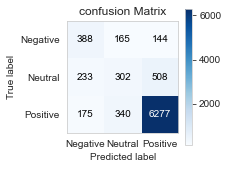

Classification report: 
              precision    recall  f1-score   support

    Negative       0.49      0.56      0.52       697
     Neutral       0.37      0.29      0.33      1043
    Positive       0.91      0.92      0.91      6792

    accuracy                           0.82      8532
   macro avg       0.59      0.59      0.59      8532
weighted avg       0.81      0.82      0.81      8532

Accuracy of the model:  0.81657290201594


In [187]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import scikitplot as skplt

plt.rcParams['figure.figsize'] = (2.5, 2.5)
cfm=skplt.metrics.plot_confusion_matrix(Y_test,y_pred)
plt.title("confusion Matrix")
plt.show()
#print(cfm)

print("Classification report: ")

print(classification_report(Y_test,y_pred))

acc=accuracy_score(Y_test, y_pred)
print("Accuracy of the model: ",acc)

# LSTM model 

In [193]:
df_main_class.head()


,Review_Text,Sentiment
0,if you have ever been to disneyland anywhere y...,Positive
1,its been a while since d last time we visit hk...,Positive
2,thanks god it wasn t too hot or too humid when...,Positive
3,hk disneyland is a great compact park. unfortu...,Positive
4,"the location is not in the city, took around h...",Positive


In [194]:
# Get length column for each text
df_main_class['text_lenght'] = df_main_class['Review_Text'].apply(len)

In [196]:
df_main_class["Sentiment"].value_counts()

Positive    33921
Neutral      5109
Negative     3626
Name: Sentiment, dtype: int64

In [198]:
df_main_class['Sentiment'] = df_main_class['Sentiment'].map({'Neutral':0, 'Positive':1,"Negative":2})

In [199]:
df_main_class["Sentiment"].value_counts()

1    33921
0     5109
2     3626
Name: Sentiment, dtype: int64

In [200]:
df_main_class.head()

,Review_Text,Sentiment,text_lenght
0,if you have ever been to disneyland anywhere y...,1,330
1,its been a while since d last time we visit hk...,1,975
2,thanks god it wasn t too hot or too humid when...,1,918
3,hk disneyland is a great compact park. unfortu...,1,485
4,"the location is not in the city, took around h...",1,159


In [204]:
X = df_main_class["Review_Text"]
Y = df_main_class["Sentiment"]

In [205]:
# Splitting the data into train and test data
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size = 0.2,random_state = 43)

In [208]:
# Text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
# Modeling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout, GlobalAveragePooling1D, Flatten, SpatialDropout1D, Bidirectional

# Tokenization
We need to convert the text message data into numerical representation, so the model will understand it.

In [209]:
# Defining pre-processing parameters
max_len = 50 
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' # out of vocabulary token
vocab_size = 500